### Setup

1. Install libraries

In [137]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
# BiocManager::install("phyloseq")
# install.packages("ggplot2")
# install.packages("vegan")
# BiocManager::install("ALDEx2")
# BiocManager::install("microbiome")
# install.packages("dplyr")
# install.packages("randomForest")

Installing package into ‘/Users/mann/Library/R/3.6/library’
(as ‘lib’ is unspecified)



2. Load required libraries

In [1]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(ALDEx2)
library(microbiome)
library(randomForest)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2019 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




3. Load data

In [2]:
map <- read.table("../03-euk_analyses//map.txt", header=T, sep="\t")
map <- map[!is.na(map$SRA_WGS_accession), ]
rownames(map) <- map$SRA_WGS_accession
head(map)

,Sample_IDs,SRA_WGS_accession,family,individual,quartier_name,born_tm,born_province,born_country,age_years,age_cat,⋯,riceFreq_cat,sodaFreq_cat,totalPoultry,totalPoultry_cat,cq,travel_3months,travel_location,travel_return,smoke_frequency,Description
,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,⋯,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>
SRR13378623,TM01-03,SRR13378623,1,3,yissouka,yes,boulkiemde,burkina_faso,18,young_adult,⋯,common,common,17,low,11.81,no,NA,NA,never,NA
SRR13378590,TM02-03,SRR13378590,2,3,yissouka,yes,boulkiemde,burkina_faso,21,young_adult,⋯,common,rare,21,mid,12.90,no,NA,NA,never,NA
SRR13378546,TM04-01,SRR13378546,4,1,yissouka,yes,boulkiemde,burkina_faso,69,elderly,⋯,common,never,40,mid,17.52,yes,Koudougou,week,never,NA
SRR13378633,TM04-02,SRR13378633,4,2,yissouka,no,sanguie,burkina_faso,52,adult,⋯,common,never,40,mid,14.73,yes,Ouagadougou,month,never,NA
SRR13378631,TM05-01,SRR13378631,5,1,tanlalle,yes,boulkiemde,burkina_faso,41,adult,⋯,common,never,25,mid,14.41,no,NA,NA,everyday,NA
SRR13378628,TM06-01,SRR13378628,6,1,badama,yes,boulkiemde,burkina_faso,66,elderly,⋯,common,rare,17,low,13.23,no,NA,NA,never,NA


In [3]:
seqtab <- read.table("wgs_seqtable.txt", header=T, row.names = 1)
head(seqtab)

,SRR13378546,SRR13378550,SRR13378552,SRR13378554,SRR13378555,SRR13378556,SRR13378560,SRR13378562,SRR13378563,SRR13378564,⋯,SRR13378621,SRR13378622,SRR13378623,SRR13378624,SRR13378625,SRR13378628,SRR13378630,SRR13378631,SRR13378632,SRR13378633
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
S1,20645,0,113,0,0,0,0,131488,0,0,⋯,309866,0,6065,27985,21228,160503,0,39,131266,0
S2,2792,0,0,0,0,0,0,0,0,0,⋯,0,0,0,3801,0,455,0,0,2847,0
S3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S4,5700,0,0,0,0,105,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S5,0,0,0,0,0,0,0,204,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S6,0,0,0,0,0,0,0,206,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [4]:
taxa <- read.table("wgs.tax.txt", header=T, sep="\t", row.names = 1)
head(taxa)

,kingdom,phylum,class,order,family,genus,species
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
S1,k__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanobrevibacter,s__Methanobrevibacter_smithii
S2,k__Archaea,p__Euryarchaeota,c__Methanobacteria,o__Methanobacteriales,f__Methanobacteriaceae,g__Methanosphaera,s__Methanosphaera_stadtmanae
S3,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Actinomycetaceae,g__Actinomyces,s__Actinomyces_graevenitzii
S4,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Actinomycetaceae,g__Actinomyces,s__Actinomyces_sp_ICM47
S5,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Actinomycetaceae,g__Actinomyces,s__Actinomyces_sp_S6_Spd3
S6,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Actinomycetaceae,g__Actinomyces,s__Actinomyces_sp_oral_taxon_181


Check to see if there are missing samples in metadata or sequence table

In [5]:
setdiff(row.names(map), colnames(seqtab))

character(0)

4. Create phyloseq object

In [6]:
ps.dat <- phyloseq(otu_table(seqtab, taxa_are_rows = TRUE), sample_data(map), tax_table(as.matrix(taxa)))
ps.dat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 271 taxa and 59 samples ]
sample_data() Sample Data:       [ 59 samples by 60 sample variables ]
tax_table()   Taxonomy Table:    [ 271 taxa by 7 taxonomic ranks ]

5. Alpha diversity 

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


pdf 
  2

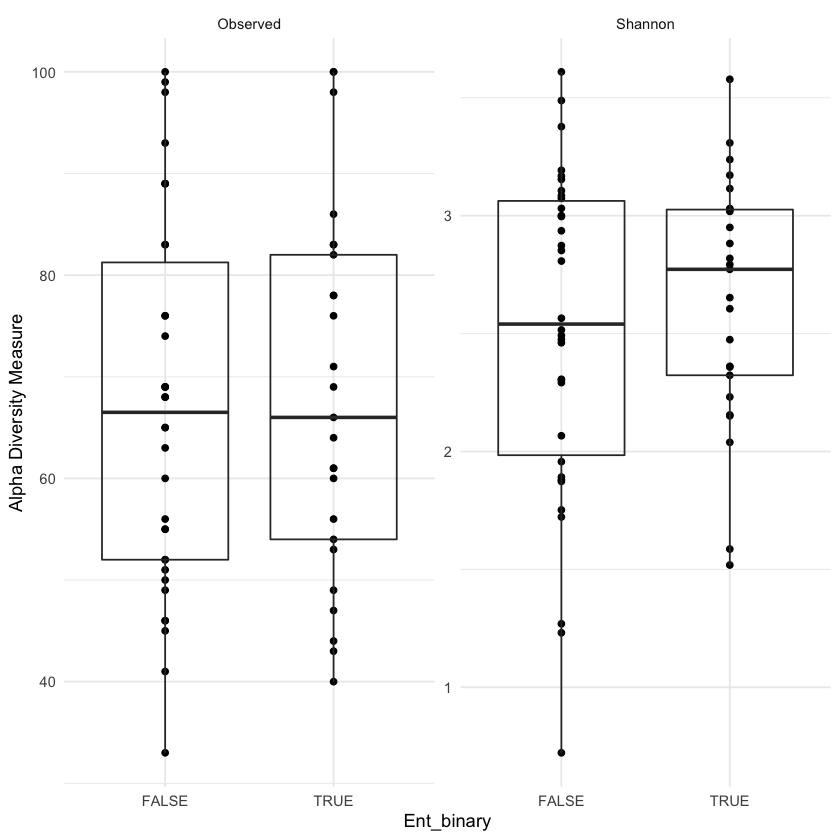

In [8]:
adiv_ent <- plot_richness(ps.dat, x="Ent_binary", measures=c("Observed", "Shannon")) + theme_minimal() + geom_boxplot(alpha=0.0)
adiv_ent
pdf("wgs_adiv_ent.pdf")
adiv_ent
dev.off()


In [10]:
rich <- estimate_richness(ps.dat)
head(rich)

Warning message in estimate_richness(ps.dat):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR13378546,56,56,0,NaN,NaN,2.807715,0.8893191,9.034984,4.671392
SRR13378550,78,78,0,NaN,NaN,2.605485,0.8739752,7.934944,5.439960
SRR13378552,47,47,0,NaN,NaN,2.151054,0.7993219,4.983106,3.686163
SRR13378554,33,33,0,NaN,NaN,1.956861,0.7614831,4.192576,2.604111
SRR13378555,46,46,0,NaN,NaN,2.515486,0.8522795,6.769541,3.690841
SRR13378556,69,69,0,NaN,NaN,1.891706,0.6378646,2.761398,5.163972


In [11]:
pairwise.wilcox.test(rich$Observed, sample_data(ps.dat)$Ent_binary, p.adj="bonf")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  rich$Observed and sample_data(ps.dat)$Ent_binary 

     FALSE
TRUE 0.82 

P value adjustment method: bonferroni 

6. Beta diversity

pdf 
  2

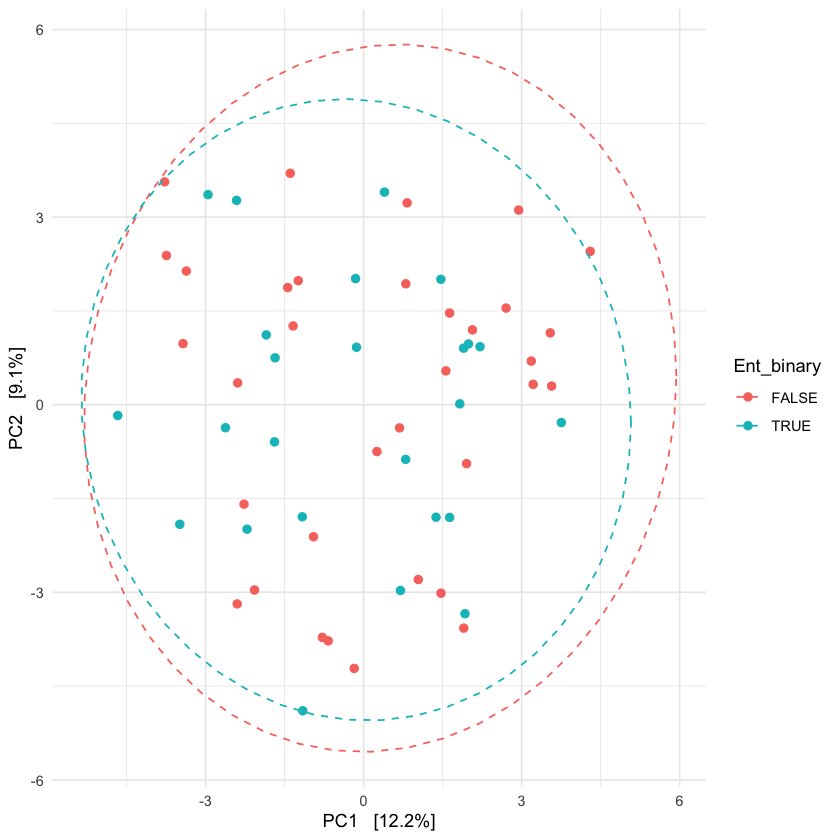

In [13]:
ps.clr <- microbiome::transform(ps.dat, "clr")
dist <- distance(ps.clr, method="euclidean")
ord <- ordinate(ps.clr, method="RDA")
bdiv_ent <- plot_ordination(ps.clr, ord, type="samples", color="Ent_binary") + geom_point(size=2) + stat_ellipse(aes(group=Ent_binary), linetype=2) + theme_minimal()
bdiv_ent
pdf("wgs_bdiv_ent.pdf")
bdiv_ent
dev.off()

In [90]:
adonis(dist ~ sample_data(ps.dat)$Ent_binary)


Call:
adonis(formula = dist ~ sample_data(ps.dat)$Ent_binary) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                               Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
sample_data(ps.dat)$Ent_binary  1      1209  1209.0 0.78891 0.01365  0.855
Residuals                      57     87350  1532.5         0.98635       
Total                          58     88559                 1.00000       

7. Differential abundance

aldex.clr: generating Monte-Carlo instances and clr values

operating in serial mode

computing center with all features

aldex.ttest: doing t-test

aldex.effect: calculating effect sizes



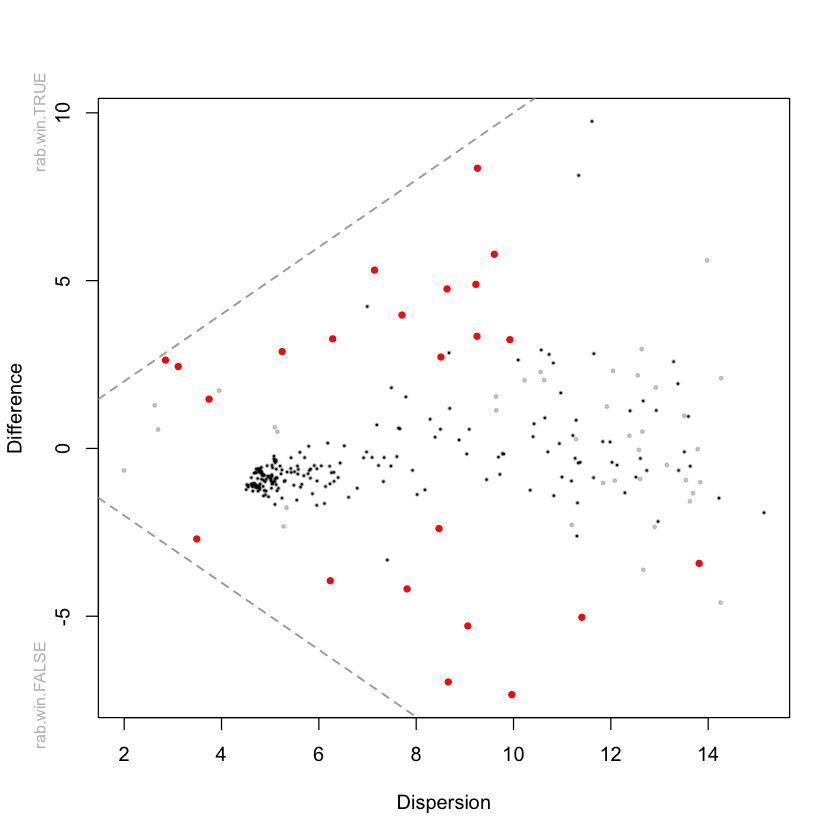

In [126]:
x.all <- aldex(seqtab, map$Ent_binary, test="t", effect=T, include.sample.summary = T, denom="all", verbose=F)
aldex.plot(x.all, type="MW", test="wilcox", xlab="Dispersion", ylab="Difference", called.cex=1, cutoff=0.05)

In [136]:
out <- cbind(x.all$we.ep, x.all$we.eBH, x.all$effect, x.all$diff.btw)
colnames(out) <- c("rawP", "adjP", "effect_size", "diff.btw")
rownames(out) <- taxa_names(ps.clr)
out <- as.data.frame(out)
out[out$adjP < 0.05,]

,rawP,adjP,effect_size,diff.btw
,<dbl>,<dbl>,<dbl>,<dbl>
S17,1.754969e-04,0.0043049704,0.7711269,2.631016
S25,7.039734e-05,0.0022889558,0.7927464,5.786260
S40,7.821946e-04,0.0133635168,-0.5924150,-5.032335
S54,1.616094e-03,0.0237409265,-0.6668852,-2.698431
S84,1.658180e-03,0.0206168947,0.7288393,9.747230
S128,3.489504e-04,0.0061270750,-0.6728923,-5.290990
S143,1.111656e-03,0.0156318749,0.5448609,3.240892
S146,1.238891e-04,0.0028345765,-0.7488805,-6.959704
S151,6.656887e-07,0.0001465103,0.8694555,5.313876
